Analysis of forest fire in terms of occurence and spread

The analysis will be carried out by using Python frameworks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
data_set = pd.read_csv('C:/Users/LENOVO/Forest fire empirical data/forestfires.csv')

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
data_set.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Trying to look out if the dataset in on a single fire or mutiple fires. multiple fires must in a data set would look like having free from fire months and multiple fires in same area during different periods

In [12]:
print (data_set['month'].unique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']


In [14]:
unique_months = data_set['month'].unique()

In [16]:
unique_months.sort()

In [18]:
print (unique_months)

['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


In [20]:
import pandas as pd

# Define calendar month order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Convert to categorical with correct order
data_set['month'] = pd.Categorical(data_set['month'], categories=month_order, ordered=True)

# Then you can sort the DataFrame by month
data_set_sorted = data_set.sort_values('month')

# To get unique months in calendar order
months_sorted = data_set['month'].unique()
print(months_sorted)

['mar', 'oct', 'aug', 'sep', 'apr', ..., 'feb', 'jan', 'dec', 'may', 'nov']
Length: 12
Categories (12, object): ['jan' < 'feb' < 'mar' < 'apr' ... 'sep' < 'oct' < 'nov' < 'dec']


In [22]:
# Your unordered month list
unique_months = ['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 
                   'feb', 'jan', 'dec', 'may', 'nov']

# Define correct calendar order
calendar_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                  'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Sort manually using the calendar order
months_sorted = sorted(unique_months, key=lambda m: calendar_order.index(m))

print(months_sorted)


['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']


In [24]:
# Define calendar order
calendar_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                  'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Group by month and check if all 'area' values are 0 in each group
zero_area_months = data_set.groupby('month')['area'].apply(lambda x: (x == 0).all())

# Reindex to match calendar order
zero_area_months = zero_area_months.reindex(calendar_order)

print(zero_area_months)


month
jan     True
feb    False
mar    False
apr    False
may    False
jun    False
jul    False
aug    False
sep    False
oct    False
nov     True
dec    False
Name: area, dtype: bool


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_32692\4005233528.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  zero_area_months = data_set.groupby('month')['area'].apply(lambda x: (x == 0).all())


We could see that there have been two fires. Feb to Oct (fire one) and December(fire two).

Let us get a spatial view of the two fires, fire one will be seen through monthly snapshots.

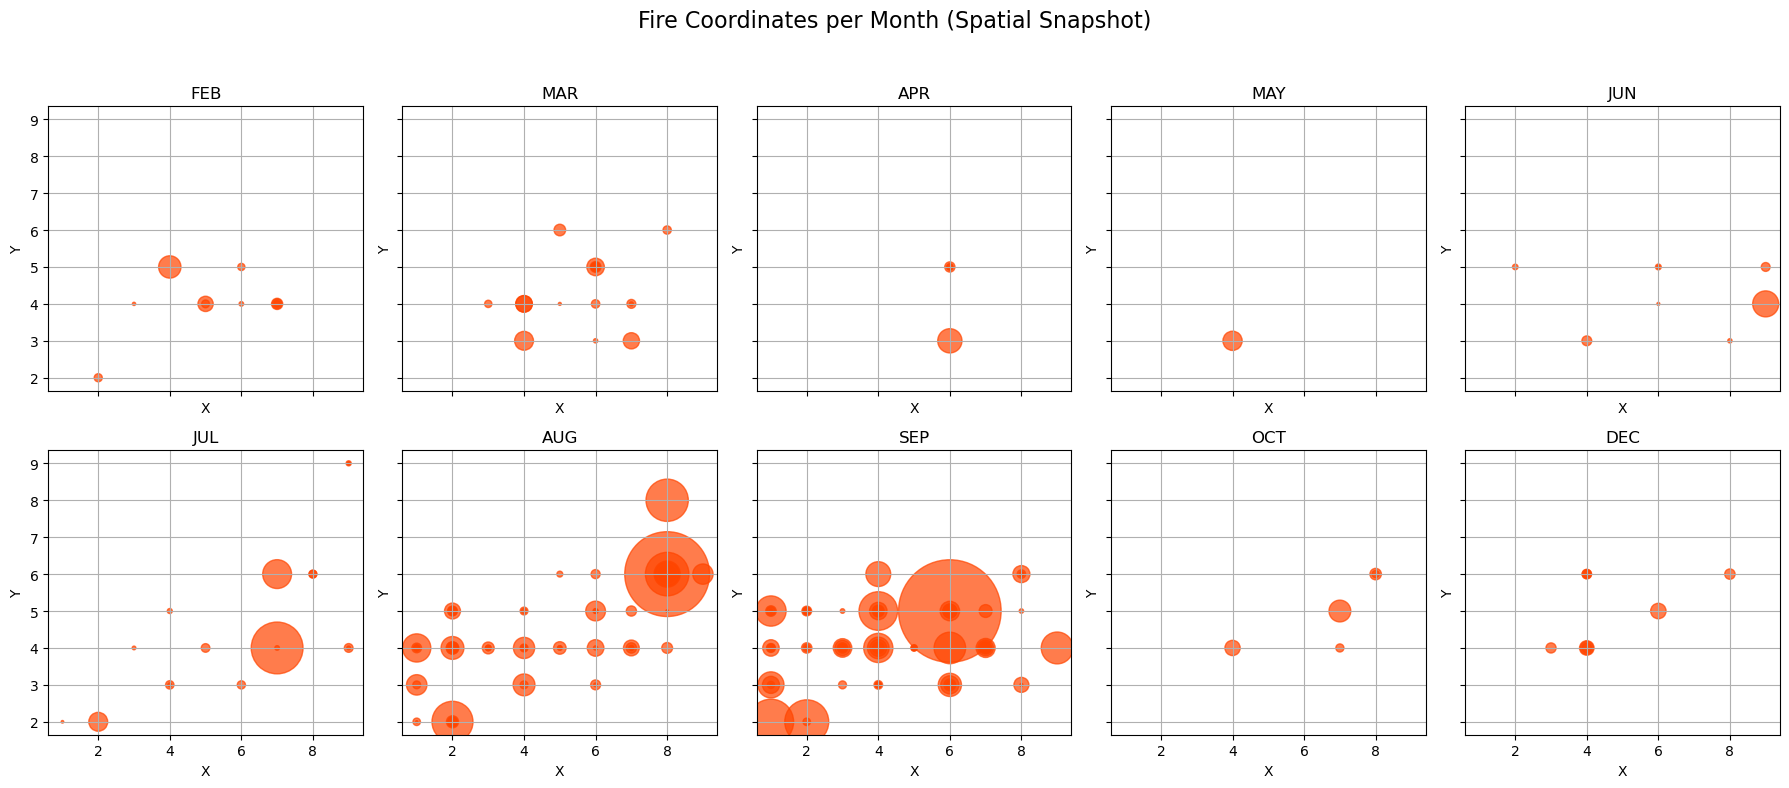

In [30]:
# Ensure the relevant months are selected
target_months = ['feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'dec']
filtered = data_set[data_set['month'].isin(target_months)].copy()
filtered['month'] = pd.Categorical(filtered['month'], categories=target_months, ordered=True)

# Set up subplots
fig, axes = plt.subplots(2, 5, figsize=(18, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot X vs Y for each month
for i, month in enumerate(target_months):
    month_data = filtered[filtered['month'] == month]
    axes[i].scatter(month_data['X'], month_data['Y'], s=month_data['area']*5, alpha=0.7, color='orangered')
    axes[i].set_title(month.upper())
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].grid(True)

# Layout
plt.suptitle('Fire Coordinates per Month (Spatial Snapshot)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


We could observe that fire spread at each coordinate behaves as a one-time stochastic event — most likely due to post-burn fuel exhaustion.
Without direct observability of fuel load or vegetation type, fire area prediction is theoretically limited.
This is not a regression problem, but a spatial stochastic process with hidden absorbing states.
Further modeling requires either simulation-based approaches or explicit fuel state inputs.